In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

In [2]:
data = pd.read_csv('data/StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
data.shape[0]

1000

In [5]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [6]:
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum() / no_of_columns * 100
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


Target looks like regression


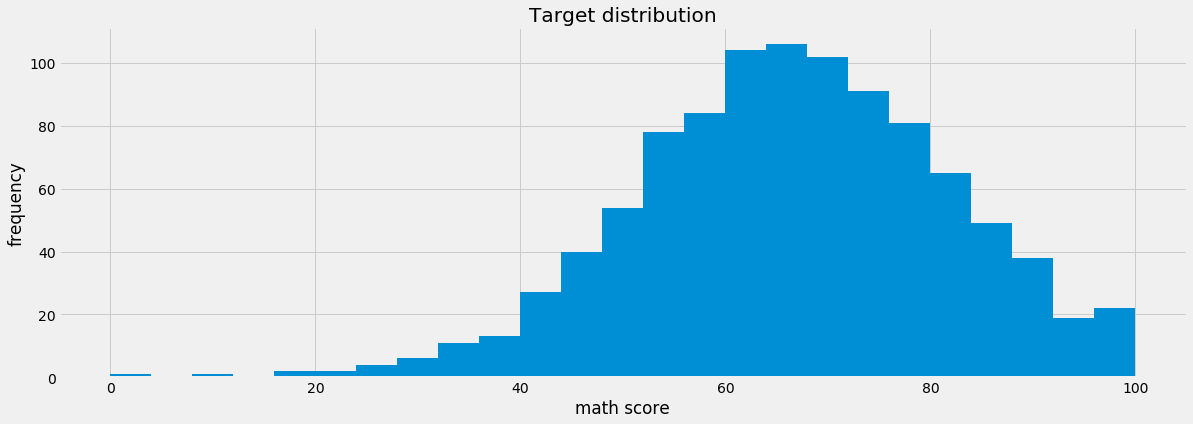

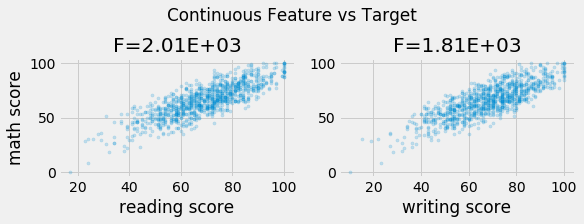

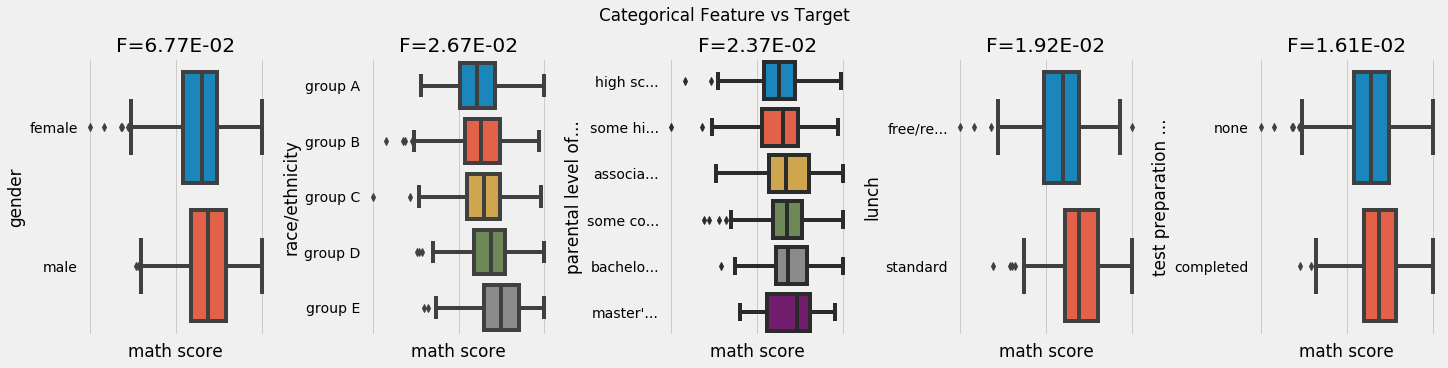

In [7]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score')

Target looks like regression


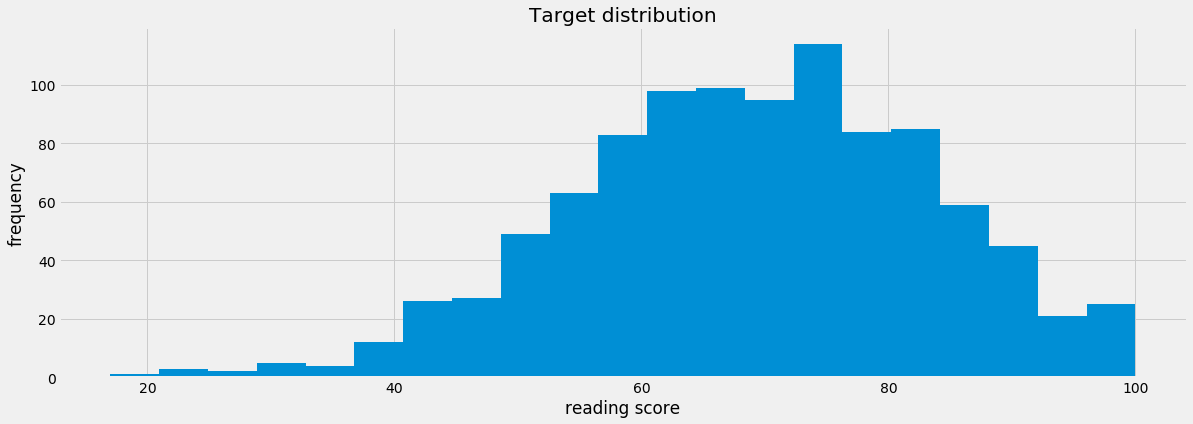

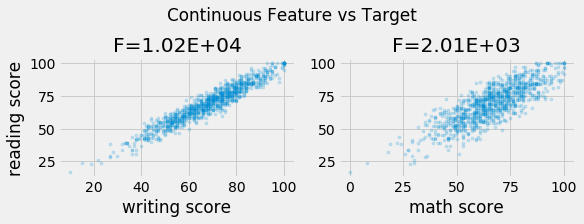

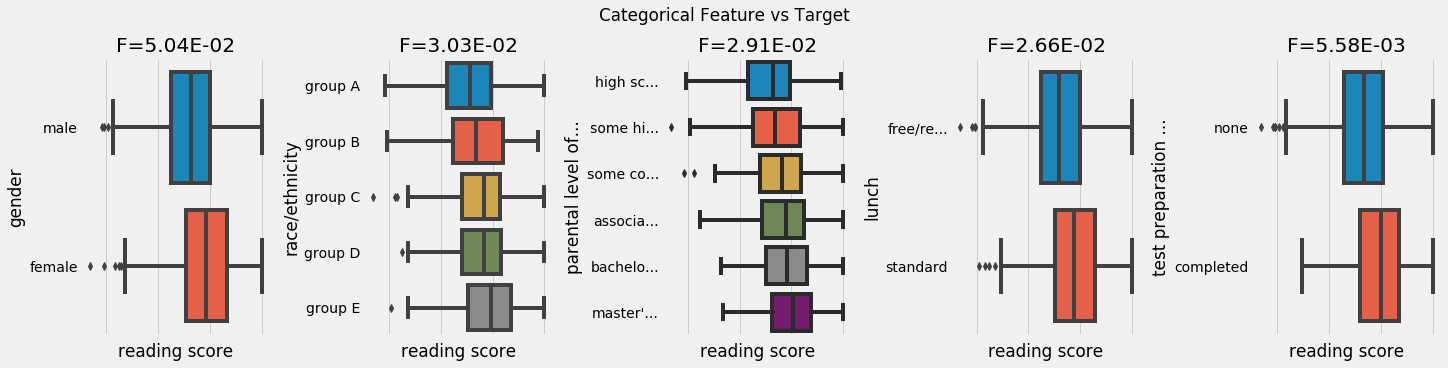

In [8]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score')

Target looks like regression


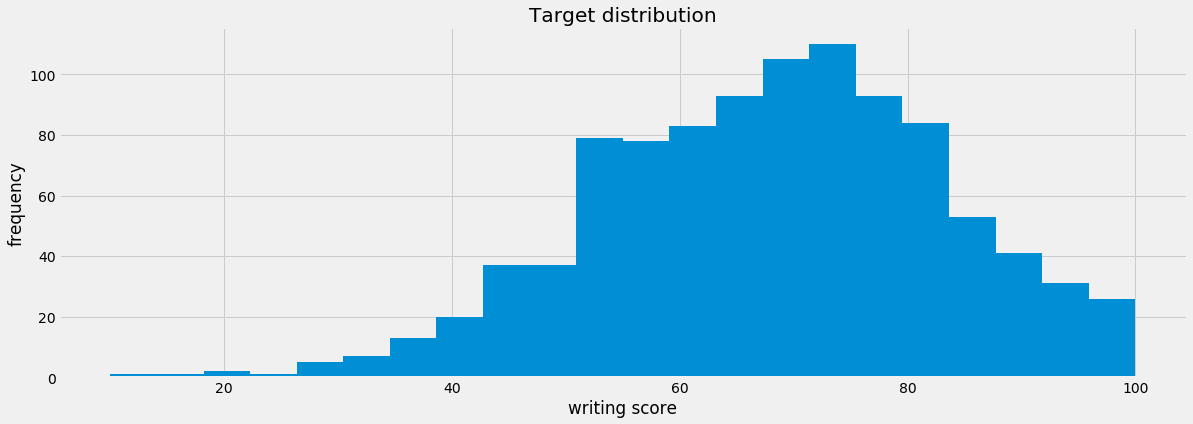

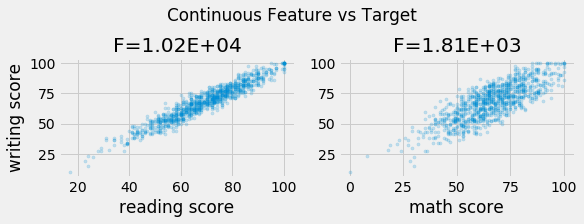

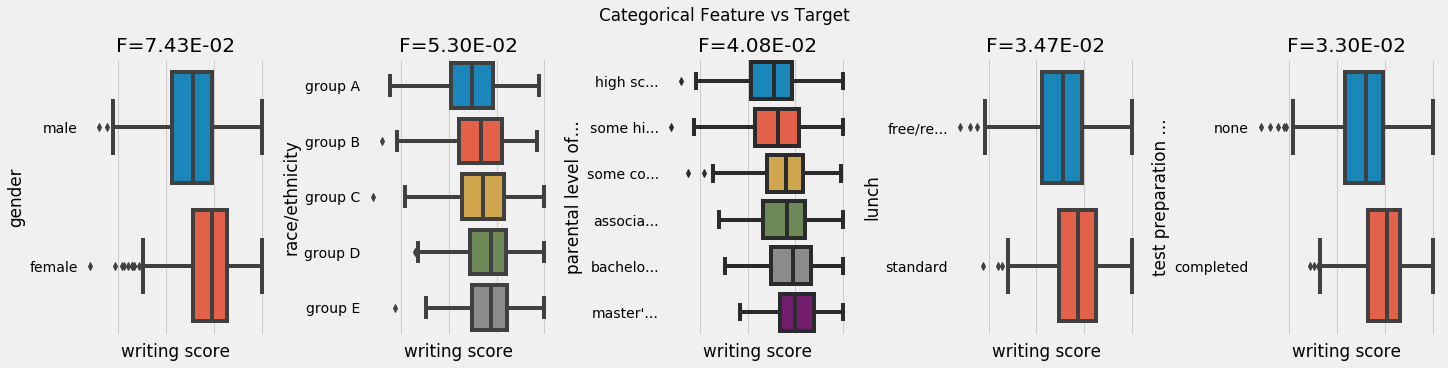

In [9]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'writing score')

In [10]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['math score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_maths = (students_score_more_than_50 / total_students) * 100
print("Probability of Students Scoring more than 50 marks in Maths :", probability_of_students_scoring_more_than_50_in_maths)

Probability of Students Scoring more than 50 marks in Maths : 85.0


In [11]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['reading score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_reading = (students_score_more_than_50 / total_students) * 100
print("Probability of Students Scoring more than 50 marks in Reading :", probability_of_students_scoring_more_than_50_in_reading)

Probability of Students Scoring more than 50 marks in Reading : 90.3


In [12]:
total_students = data.shape[0]
students_score_more_than_50 = data[data['writing score'] > 50].shape[0]

probability_of_students_scoring_more_than_50_in_writing = (students_score_more_than_50 / total_students) * 100
print("Probability of Students Scoring more than 50 marks in Reading :", probability_of_students_scoring_more_than_50_in_writing)

Probability of Students Scoring more than 50 marks in Reading : 87.6


In [13]:
total_students = data.shape[0]
passing_mark = 40
number_of_students_passing_in_all_subjects = data[(data['math score'] > passing_mark) 
                                                  & (data['reading score'] > passing_mark) 
                                                  & (data['writing score'] > passing_mark)].shape[0]
probability_of_students_passing_in_all_the_subjects = (number_of_students_passing_in_all_subjects / total_students) * 100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_passing_in_all_the_subjects))

The Probability of Students Passing in all the Subjects is 93.90 %


In [14]:
total_students = data.shape[0]
Grade_A = 80
number_of_students_scoring_grade_A = data[(data['math score'] > Grade_A) 
                                                  & (data['reading score'] > Grade_A) 
                                                  & (data['writing score'] > Grade_A)].shape[0]
probability_of_students_scoring_grade_A = (number_of_students_scoring_grade_A / total_students) * 100
print("The Probability of Students Passing in all the Subjects is {0:.2f} %".format(probability_of_students_scoring_grade_A))

The Probability of Students Passing in all the Subjects is 11.00 %


Text(0.5, 0.98, 'Checking for Skewness')

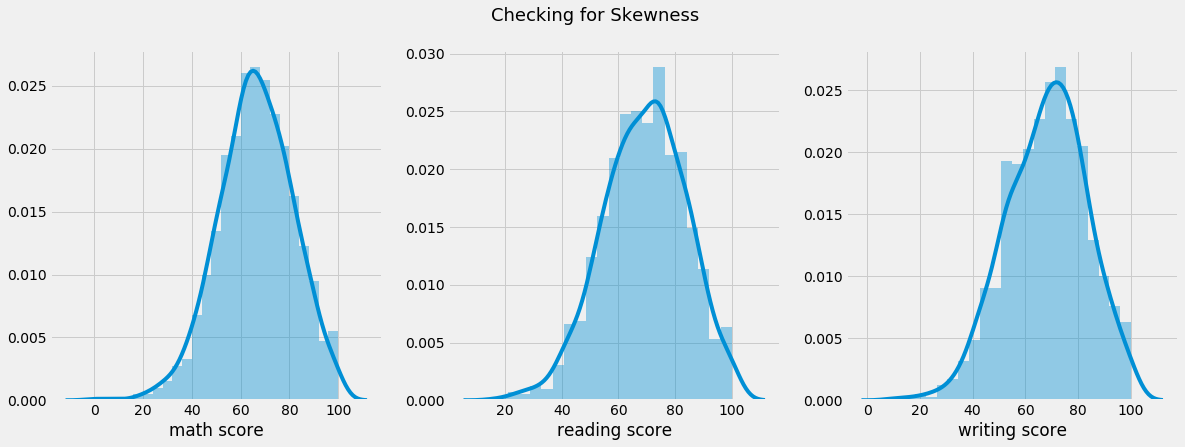

In [15]:
plt.subplot(1,3,1)
sns.distplot(data['math score'])

plt.subplot(1,3,2)
sns.distplot(data['reading score'])

plt.subplot(1,3,3)
sns.distplot(data['writing score'])

plt.suptitle('Checking for Skewness', fontsize=18)

In [16]:
np.random.seed(6)

sample_math_marks = np.random.choice(a=data['math score'], size=100)
print("Sample mean for Math:", sample_math_marks.mean())
print("Population mean for Math:", data['math score'].mean())

sample_reading_marks = np.random.choice(a=data['reading score'], size=100)
print("\nSample mean for Reading:", sample_reading_marks.mean())
print("Population mean for Reading:", data['reading score'].mean())

sample_writing_marks = np.random.choice(a=data['writing score'], size=100)
print("\nSample mean for Writing:", sample_writing_marks.mean())
print("Population mean for Writing:", data['writing score'].mean())

Sample mean for Math: 63.12
Population mean for Math: 66.089

Sample mean for Reading: 68.5
Population mean for Reading: 69.169

Sample mean for Writing: 71.46
Population mean for Writing: 68.054


In [17]:
np.random.seed(101)

sample_math_marks = np.random.choice(a=data['math score'], size=100)
print("Sample mean for Math:", sample_math_marks.mean())
print("Population mean for Math:", data['math score'].mean())

sample_reading_marks = np.random.choice(a=data['reading score'], size=100)
print("\nSample mean for Reading:", sample_reading_marks.mean())
print("Population mean for Reading:", data['reading score'].mean())

sample_writing_marks = np.random.choice(a=data['writing score'], size=100)
print("\nSample mean for Writing:", sample_writing_marks.mean())
print("Population mean for Writing:", data['writing score'].mean())

Sample mean for Math: 64.66
Population mean for Math: 66.089

Sample mean for Reading: 70.28
Population mean for Reading: 69.169

Sample mean for Writing: 66.34
Population mean for Writing: 68.054


In [18]:
import scipy.stats as stats
import math

In [19]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a=data['math score'], 
                          size=sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.95)
print("z_critical value:", z_critical)

pop_stdve = data['math score'].std()
margin_of_error = z_critical * (pop_stdve / math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Confidence interval:", end=" ")
print(confidence_interval)
print("True mean: {}".format(data['math score'].mean()))

z_critical value: 1.6448536269514722
Confidence interval: (64.82729483328328, 66.40470516671672)
True mean: 66.089


In [20]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a=data['reading score'], 
                          size=sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.95)
print("z_critical value:", z_critical)

pop_stdve = data['reading score'].std()
margin_of_error = z_critical * (pop_stdve / math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Confidence interval:", end=" ")
print(confidence_interval)
print("True mean: {}".format(data['reading score'].mean()))

z_critical value: 1.6448536269514722
Confidence interval: (67.75757337011645, 69.27642662988355)
True mean: 69.169


In [21]:
np.random.seed(10)

sample_size = 1000
sample = np.random.choice(a=data['writing score'], 
                          size=sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.95)
print("z_critical value:", z_critical)

pop_stdve = data['writing score'].std()
margin_of_error = z_critical * (pop_stdve / math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Confidence interval:", end=" ")
print(confidence_interval)
print("True mean: {}".format(data['writing score'].mean()))

z_critical value: 1.6448536269514722
Confidence interval: (66.80960035030861, 68.39039964969137)
True mean: 68.054


In [22]:
data[(data['gender'] == 'female') & 
     (data['math score'] > 90) & 
     (data['reading score'] > 90) & 
     (data['writing score'] > 90)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
594,female,group C,bachelor's degree,standard,completed,92,100,99
685,female,group E,master's degree,standard,completed,94,99,100
712,female,group D,some college,standard,none,98,100,99


In [23]:
data.groupby(['gender']).agg(['min', 'median', 'max'])

math score             reading score             writing score         \
              min median  max           min median  max           min median   
gender                                                                         
female          0     65  100            17     73  100            10     74   
male           27     69  100            23     66  100            15     64   

             
        max  
gender       
female  100  
male    100

In [24]:
data[['lunch', 
      'gender', 
      'math score', 
      'writing score', 
      'reading score']].groupby(['lunch', 'gender']).agg('median')

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [25]:
data[['test preparation course', 
      'gender', 
      'math score', 
      'writing score', 
      'reading score']].groupby(['test preparation course', 'gender']).agg('median')

math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

In [26]:
data[['race/ethnicity',
      'math score',
      'writing score',
      'reading score']].groupby(['race/ethnicity']).agg('median')

,math score,writing score,reading score
race/ethnicity,,,
group A,61.0,62.0,64.0
group B,63.0,67.0,67.0
group C,65.0,68.0,71.0
group D,69.0,72.0,71.0
group E,74.5,72.0,74.0


Text(0, 0.5, 'Count')

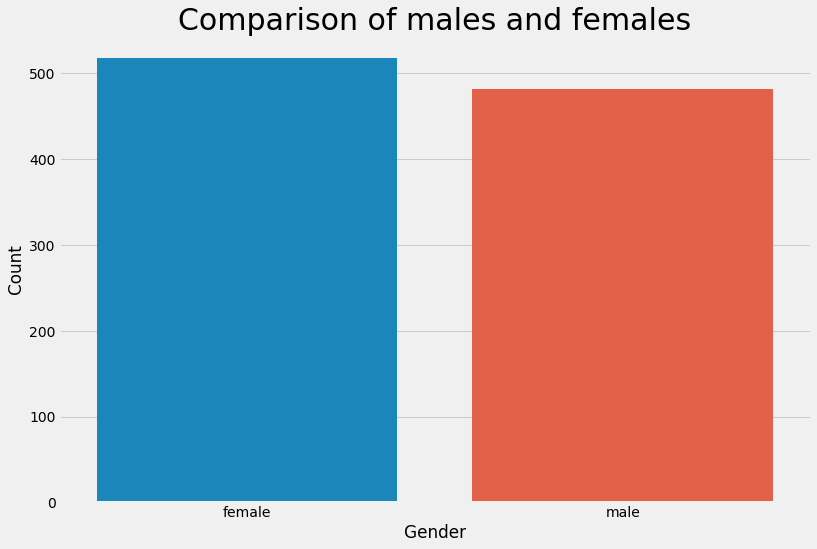

In [27]:
plt.figure(figsize=(12,8))
sns.countplot(data['gender'])
plt.title('Comparison of males and females', fontsize=30)
plt.xlabel('Gender')
plt.ylabel('Count')

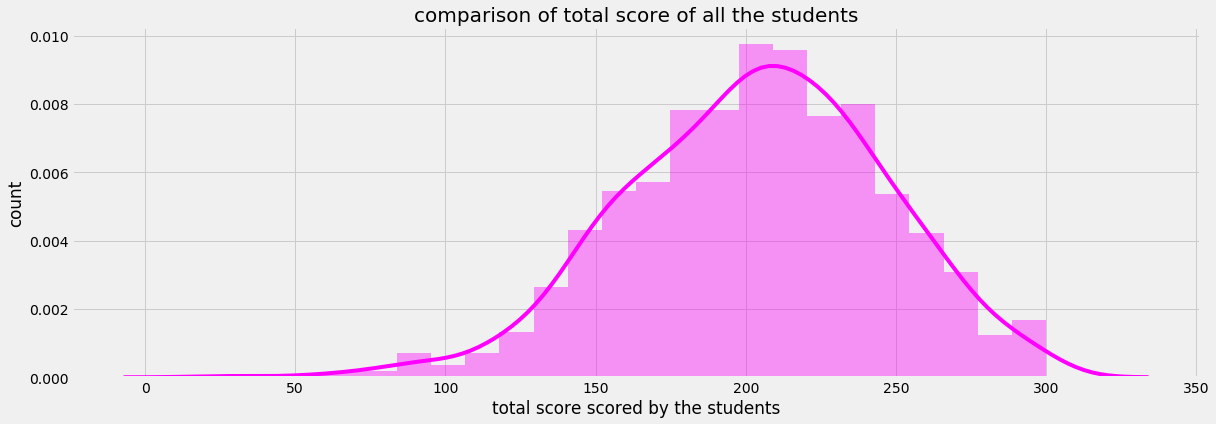

In [28]:
data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

Text(0, 0.5, 'Count')

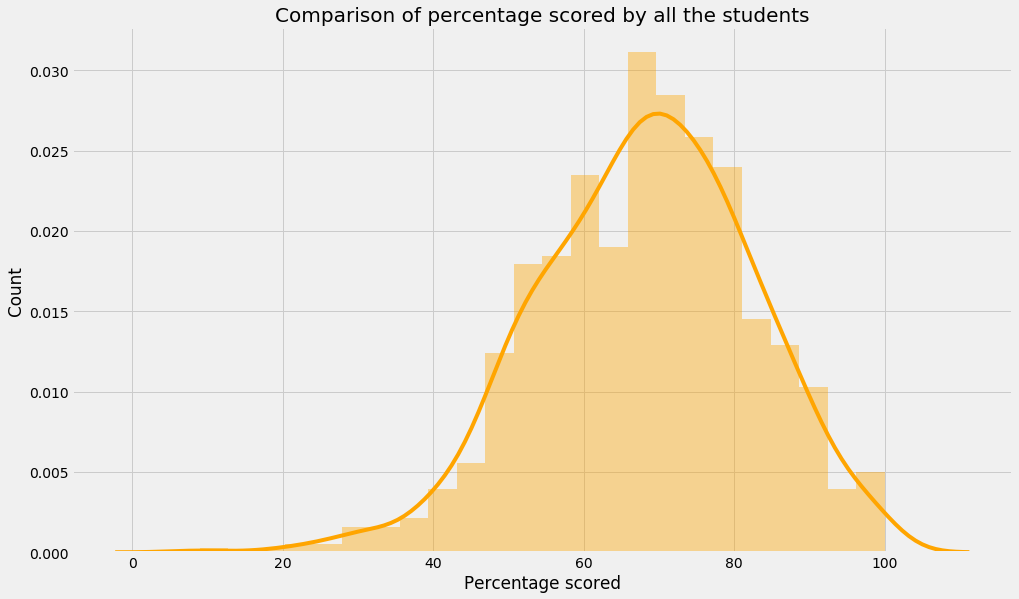

In [29]:
from math import *
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')

Text(0, 0.5, 'count')

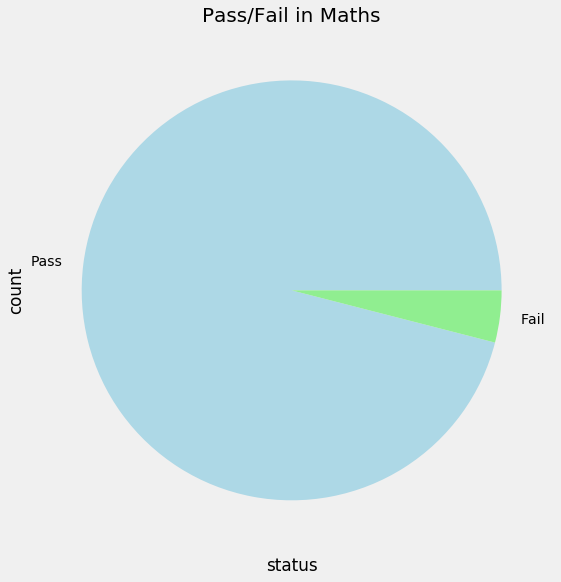

In [30]:
passmarks = 40


data['pass_math'] = np.where(data['math score'] < passmarks, 'Fail', 'Pass')
data['pass_math'].value_counts().plot.pie(colors = ['lightblue', 'lightgreen'])

plt.title('Pass/Fail in Maths', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')

Text(0, 0.5, 'count')

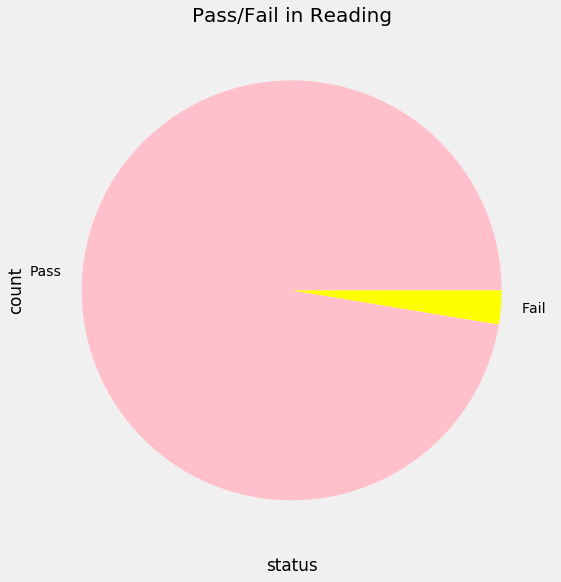

In [31]:
data['pass_reading'] = np.where(data['reading score'] < passmarks, 'Fail', 'Pass')
data['pass_reading'].value_counts(dropna = False).plot.pie(colors = ['pink', 'yellow'])

plt.title('Pass/Fail in Reading', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')

Text(0, 0.5, 'count')

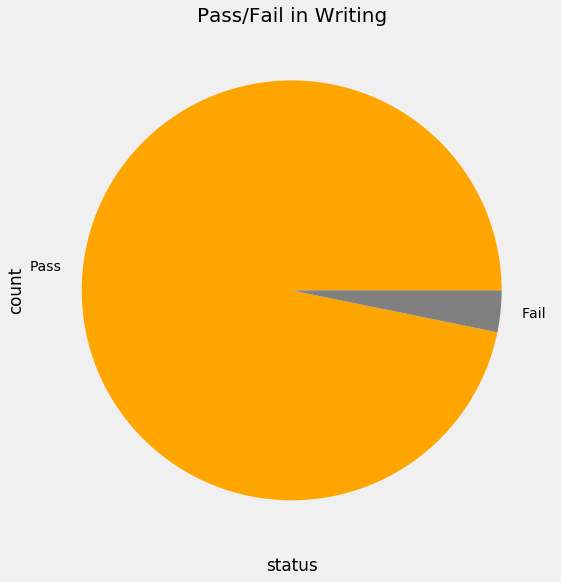

In [32]:
data['pass_writing'] = np.where(data['writing score'] < passmarks, 'Fail', 'Pass')
data['pass_writing'].value_counts(dropna = False).plot.pie(colors = ['orange', 'gray'])

plt.title('Pass/Fail in Writing', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')

Text(0, 0.5, 'count')

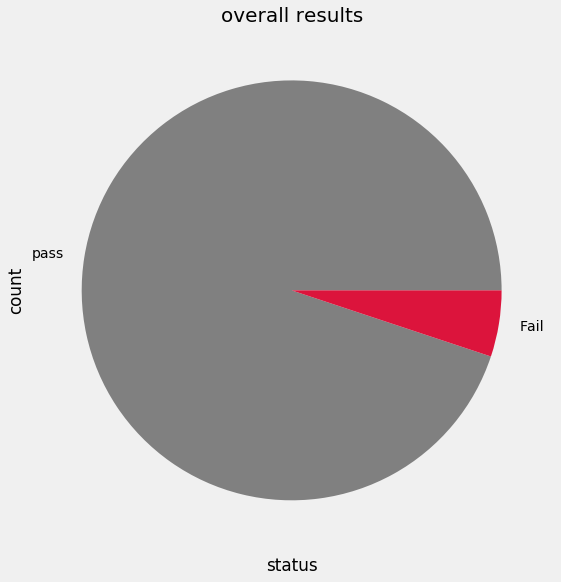

In [33]:
data['status'] = data.apply(lambda x : 'Fail' if x['pass_math'] == 'Fail' or 
                           x['pass_reading'] == 'Fail' or x['pass_writing'] == 'Fail'
                           else 'pass', axis = 1)

data['status'].value_counts(dropna = False).plot.pie(colors = ['grey', 'crimson'])
plt.title('overall results', fontweight = 30, fontsize = 20)
plt.xlabel('status')
plt.ylabel('count')

In [34]:
def getgrade(percentage, status):
    if status == 'Fail':
        return 'E'
    if (percentage >= 90):
        return 'O'
    if (percentage >= 80):
        return 'A'
    if (percentage >= 70):
        return 'B'
    if (percentage >= 60):
        return 'C'
    if (percentage >= 40):
        return 'D'
    else:
        return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage'], x['status']), axis = 1 )
data['grades'].value_counts()

B    260
C    252
D    223
A    156
O     58
E     51
Name: grades, dtype: int64

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

data['test preparation course'] = le.fit_transform(data['test preparation course'])
data['lunch'] = le.fit_transform(data['lunch'])

data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['gender'] = le.fit_transform(data['gender'])
data['pass_math'] = le.fit_transform(data['pass_math'])
data['pass_reading'] = le.fit_transform(data['pass_reading'])
data['pass_writing'] = le.fit_transform(data['pass_writing'])
data['status'] = le.fit_transform(data['status'])

In [37]:
X = data.iloc[:,:14]
y = data.iloc[:,14]

print(X)
print(y)

     gender  race/ethnicity  parental level of education  lunch  \
0         0               2                            1      1   
1         0               3                            4      1   
2         0               2                            3      1   
3         1               1                            0      0   
4         1               3                            4      1   
..      ...             ...                          ...    ...   
995       0               5                            3      1   
996       1               3                            2      0   
997       0               3                            2      0   
998       0               4                            4      1   
999       0               4                            4      0   

     test preparation course  math score  reading score  writing score  \
0                          1          72             72             74   
1                          0          69       

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
mm = MinMaxScaler()

X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("Training Accuracy:", lr.score(X_train, y_train))
print("Testing Accuracy:", lr.score(X_test, y_test))

Training Accuracy: 0.864
Testing Accuracy: 0.844


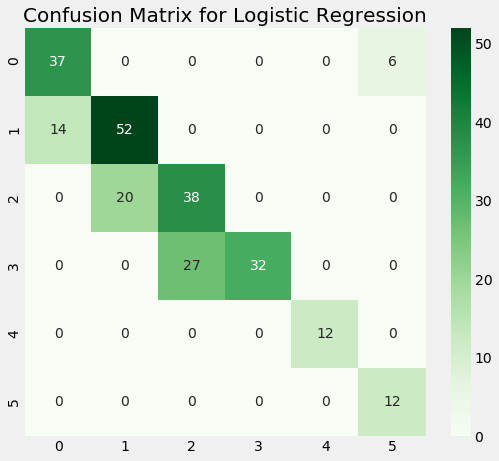

In [56]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

In [51]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.732


Text(0.5, 1, 'Confusion Matrix for Random Forest')

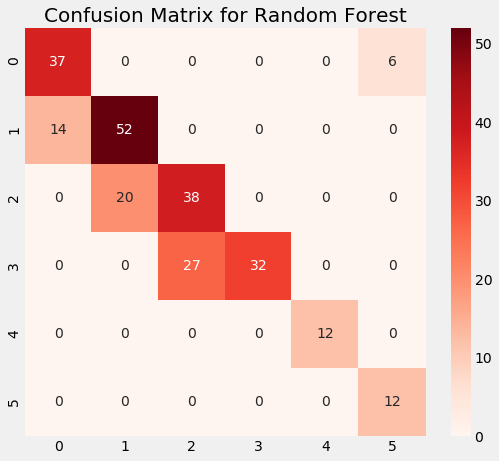

In [55]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.rcParams['figure.figsize'] = (8, 7)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)

Text(0.5, 1.0, 'Radial Visualization for Target')

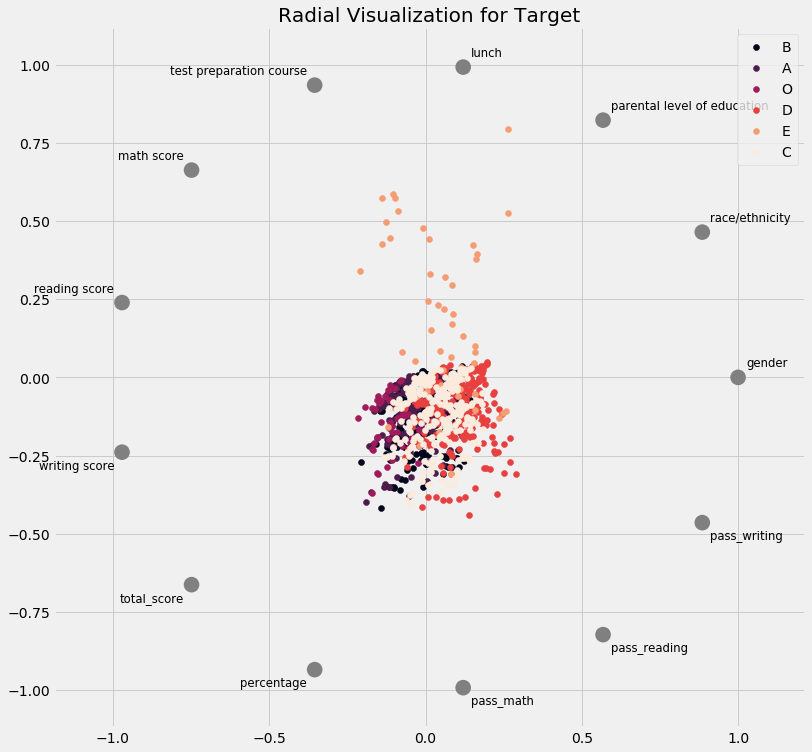

In [58]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(12, 12))
new_df = X.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Radial Visualization for Target', fontsize = 20)